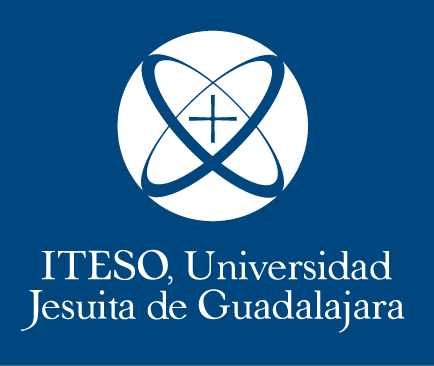

## <center> Quantitative Finance S. 2022 <center/>
## <center> Professor José Mario Zárate <center/>
### <center> Homework 5 <center/>

### <center> Díaz Verduzco Alexia Marisol IF720500 <center/>
### <center> González Reyes Christian Eduardo IF721850 <center/>
### <center> López Lazareno Diego Alberto IF722100 <center/>
### <center> Romero Riggen Santiago IF715099 <center/>

In [1]:
#Required libraries
import yfinance as yf
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
from fitter import Fitter, get_distributions
import warnings
from scipy import stats as st
warnings.filterwarnings("ignore")

# Functions
def leveneTest(data1 : "Sample 1", data2 : "Sample 2", significanceLevel : "Significance level"):
    """
    leveneTest tests the null hypothesis that all input samples are from populations with equal variances. 
    Reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html
    
    """
   
    t, pvalue = st.levene(data1, data2)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the two samples are from populations with equal variances")
        
    else:
        print("Reject the null hypothesis: the two samples aren't from populations with equal variances")
        
def twoSampleTTest(data1 : "Sample 1", data2 : "Sample 2", significanceLevel : "Significance level", equalVar = True):
    """
    twoSampleTTest tests the null hypothesis that 2 independent samples have identical average (expected) values.
    Reference: https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.ttest_ind.html
    
    """
    
    t, pvalue = st.ttest_ind(data1, data2, equal_var = equalVar)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the two samples have identical average values")
        
    else:
        print("Reject the null hypothesis: the two samples don't have identical average values")
        
def normalTest(data : "Sample", significanceLevel : "Significance level"):
    """
    normalTest tests the null hypothesis that a sample comes from a normal distribution.
    Reference: http://scipy.github.io/devdocs/reference/generated/scipy.stats.normaltest.html
    
    """
    
    t, pvalue = st.normaltest(data)
    
    if pvalue >= significanceLevel:
        print("Fail to reject the null hypothesis: the sample comes from a normal distribution")
        
    else:
        print("Reject the null hypothesis: the sample doesn´t come from a normal distribution")
        
def stocksModel(ticker : "Ticker symbol", start : "Start date", end : "End date", N : "Number of scenarios"):
    """
    stocksModel simulates a stock's behavior.
    
    """
    
    # Data download
    data = yf.download(ticker, start = start, end = end, progress = False)["Adj Close"]
    returns = data.pct_change().dropna()
    mu, sigma = returns.mean(), returns.std()
    S0 = data.iloc[0]
    
    # Simulation
    datan = pd.DataFrame(np.zeros((len(data), N)))
    datan["Adj Close"] = data.values

    for j in range(N):
        simulation = [S0]
        for i in range(len(data) - 1):
            simulation.append(simulation[-1] * np.exp((mu - sigma ** 2 / 2) + sigma * np.random.normal()))

        datan[j] = simulation
        
    datan.index = data.index
    
    return datan

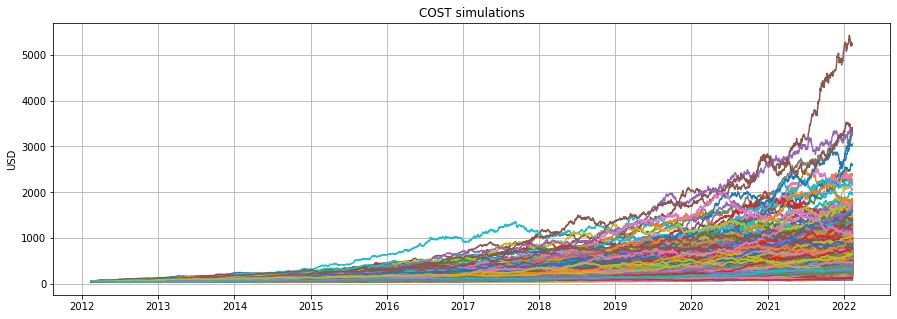

In [2]:
# Simulation
ticker = "COST"
end = dt.datetime.today()
start = end - dt.timedelta(10 * 365)
results = stocksModel(ticker, start, end, 1000)

# Visualization
plt.figure(figsize = (15, 5))
plt.title(ticker + " simulations")
plt.plot(results.iloc[:, :-1])
plt.grid()
plt.ylabel("USD");

In [3]:
# Calculating percentual and logarithmic returns
R = [] # Percentual returns
r = [] # Logarithmic returns

for k in results:
    R.append(results[k].pct_change().dropna())
    r.append((np.log(results[k])-np.log(results[k].shift(1))).dropna())
    
dataR = pd.DataFrame(R).T
datar = pd.DataFrame(r).T

# Percentual and logarithmic returns (1 simulated path)
dataR_new = dataR.iloc[:, 0]
datar_new = datar.iloc[:, 0]
# Percentual and logarithmic returns (actual returns)
dataclose_R = results.iloc[:,-1].pct_change().dropna()
dataclose_r = (np.log(results.iloc[:,-1])-np.log(results.iloc[:,-1].shift(1))).dropna()
# Information
Data_New_1 = pd.DataFrame({"Costco R" : dataclose_R, "Costco r" : dataclose_r,"R" : dataR_new, "r" : datar_new })
Data_New_1

,Costco R,Costco r,R,r
Date,,,,
2012-02-16,0.009731,0.009684,0.009933,0.009884
2012-02-17,0.004997,0.004984,0.003644,0.003638
2012-02-21,-0.002486,-0.002489,0.018286,0.018121
2012-02-22,0.000593,0.000593,0.007907,0.007876
2012-02-23,0.005456,0.005441,-0.010948,-0.011008
...,...,...,...,...
2022-02-07,-0.007465,-0.007493,0.003962,0.003954
2022-02-08,0.010196,0.010144,-0.013759,-0.013854
2022-02-09,0.014737,0.014629,-0.002189,-0.002191


## Test 1: Levene Test (Percentual Returns: Simulated VS Actual)

In [4]:
leveneTest(Data_New_1['Costco R'], Data_New_1['R'], 0.05)

Reject the null hypothesis: the two samples aren't from populations with equal variances


## Test 1: Levene Test (Logarithmic Returns: Simulated VS Actual)

In [5]:
leveneTest(Data_New_1['Costco r'], Data_New_1['r'], 0.05)

Reject the null hypothesis: the two samples aren't from populations with equal variances


## Test 2: Two Sample T-Test (Percentual Returns: Simulated VS Actual)

In [6]:
twoSampleTTest(Data_New_1['Costco R'], Data_New_1['R'], 0.05, equalVar = False)

Fail to reject the null hypothesis: the two samples have identical average values


## Test 2: Two Sample T-Test (Logarithmic Returns: Simulated VS Actual)

In [7]:
twoSampleTTest(Data_New_1['Costco r'], Data_New_1['r'], 0.05, equalVar = False)

Fail to reject the null hypothesis: the two samples have identical average values


## Test 3: Normal Distribution (Simulated Percentual Returns)

In [8]:
normalTest(Data_New_1['R'], 0.05)

Fail to reject the null hypothesis: the sample comes from a normal distribution


## Test 3: Normal Distribution (Simulated Logarithmic Returns)

In [9]:
normalTest(Data_New_1['r'], 0.05)

Fail to reject the null hypothesis: the sample comes from a normal distribution


## Summary and Conclusion

We'd like to conclude by making a little recap of what this homework was about. We started by defining as functions most of the work, for plots, to apply the three tests and the last one for the data download and the simulation, to make it as easier to use and as efficient as possible.

Then we ran a thousand simulations for the asset we chose <b>"Costco (COST)"</b> and by using the formula to calculate the geometric brownian motion which, in finance, is used to model stock prices in the Black–Scholes model, we managed to model the possible stock price behavior.

The equation is expressed as:

![Imagen](https://wikimedia.org/api/rest_v1/media/math/render/svg/afca4d79e7660b6c39c8196e7ad58d9f42650a5d)

And finished by running the three tests (variances, mean and normality) for both logarithmic and percentual returns to be able to compare them (the simulated returns vs the actual returns for Costco) and see if they're both equal and normal, to make inferences about possible differences between the two samples with a certain confidence level (which in our case was 95%). 
We could see that for both scenarios (log and %) that:

- The two samples don't have equal variances. 
- The two samples have identical average values (mean).
- The simulated samples come from a normal distribution. This was to be expected, since the simulations were done under a model that is built with assumptions of normality.

This way we can see that this model can be very useful for option valuation for an exact date but after seeing the simulations we can see that one of the weaknesses is the inaccuracy due to external events and as we can see, the range of variation can be very wide.